In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
path= '/content/drive/MyDrive/hand_signs.zip'
with zipfile.ZipFile(path,'r') as zr:
  zr.extractall("content/data")

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen= ImageDataGenerator(
    rescale= 1./255,
    rotation_range= 20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2

)

train_set= train_gen.flow_from_directory(
    '/content/content/data/leapGestRecog',
    target_size=(64,64),
    batch_size=32,
    class_mode= 'categorical',
    subset='training'

)
val_gen= ImageDataGenerator(rescale= 1./255,  validation_split=0.2
)


val_set= val_gen.flow_from_directory(
    '/content/content/data/leapGestRecog',
    target_size=(64,64),
    batch_size=32,
    class_mode= 'categorical',
    subset='validation'
)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


In [4]:
print("Classes found:", train_set.class_indices)




Classes found: {'00': 0, '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8, '09': 9}


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout

model= Sequential()
#First Convo layer
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
#Second Conv layer

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

#model.add(Conv2D(128,(3,3),activation='relu'))
#model.add(MaxPooling2D(2,2))

model.add(Flatten())
#fully conneteced layer
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(train_set.num_classes,activation='softmax'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']

)

In [7]:
history = model.fit(
    train_set,
    epochs=5,
    validation_data=val_set
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 147s 290ms/step - accuracy: 0.3680 - loss: 1.7351 - val_accuracy: 0.6330 - val_loss: 1.4020
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 147s 293ms/step - accuracy: 0.8033 - loss: 0.5458 - val_accuracy: 0.7260 - val_loss: 1.1505
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 144s 287ms/step - accuracy: 0.8760 - loss: 0.3418 - val_accuracy: 0.8320 - val_loss: 0.8728
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 290ms/step - accuracy: 0.9107 - loss: 0.2405 - val_accuracy: 0.7577 - val_loss: 1.2307
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 303ms/step - accuracy: 0.9292 - loss: 0.1916 - val_accuracy: 0.8462 - val_loss: 0.7830


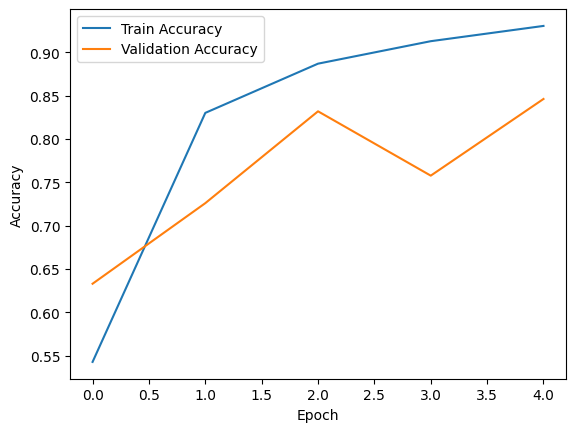

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
import keras
keras.saving.save_model(model, 'hand_gesture_cnn_84.keras')
from google.colab import files
files.download('hand_gesture_cnn_84.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>